In [5]:
pip install  matplotlib  palettable numpy 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.9 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 7.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import palettable
import numpy as np
from typing import List, Dict, Tuple, Set
import matplotlib.ticker as ticker
import os
import sys
import pandas as pd
import matplotlib

colors = palettable.colorbrewer.qualitative.Paired_12.hex_colors
linestyles = ['-', '--']
colors_blue = colors[1]
colors_red = colors[5]
colors_green = colors[3]
colors_orange = colors[7]
colors_purple = colors[9]
colors_yellow = colors[10]

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

class Legend:
    Our = "COSMOS"
    Baseline_P = "Palette"
    Baseline_F = "FaaSCache"
    Version_place = "Placement*"
    Version_scheduling = "Scheduling*"
    Util_Resource_idle = "Idle Resource"
    Util_Container_idle = "Standby Instance"
    Util_Cold_start = "Cold Start"
    Util_Task_execution = "Task Execution"
    
class Title:
    Y_Utilization_CPU = "CPU Utilization (%)"
    Y_Utilization_memory = "Memory Utilization (%)"
    Y_Latency_tail = "95-Tail latency (sec)"
    Y_Task_Throughput = "Task throughput (TPS)"
    X_Distribution_norm = "Norm-85"
    X_Distribution_zipf = "Zipf-80"
    X_Distribution_simple = "Uniform-75%"
    X_Function_5 = "5"
    X_Function_10 = "10"
    X_Function_20 = "20"
    X_Skew_zipf_0 = "zipf-0"
    X_Skew_zipf_80 = "zipf-80"
    X_Skew_zipf_100 = "zipf-100"
    X_Skew_uniform = "Uniform"
    X_Skew_zipf = "Zipf-distributed"
    X_Label_distribution = "Resource Distribution"
    X_Label_func_number = "Number of functions"
    X_Label_skew = "Workload Distributed"
    X_Consumption_CPU = "Detail CPU Consumption (%)"
    X_Consumption_memory = "Detail Memory Consumption (%)"
    
class File:
    distribution = "distribution"
    func_number = "func_number"
    skew = "skew"
    big_cluster = "16worker_distribution"
    detail_cpu = "detail_cpu"
    detail_memory = "detail_memory"
    overhead_p = "overhead_placement"
    overhead_s = "overhead_scheduling"
    xiaorong_util = "xiaorong_util"
    xiaorong_throughput = "xiaorong_throughput"


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [6]:
# 组图1/3/4/5 (此处只报告前三项)
def my_print(file_name, y_label, y_list_my, y_list_base_p, y_list_base_f, y_list):
    font_size = 24
    plt.rc('font',**{'size': font_size})
    plt.rc('pdf',fonttype = 42)
    fig, ax = plt.subplots(figsize=(10, 5))
    
    if file_name == File.distribution or file_name == File.big_cluster:
        distributions = [Title.X_Distribution_norm, Title.X_Distribution_simple, Title.X_Distribution_zipf]
        ax.set_xlabel(Title.X_Label_distribution)
    elif file_name == File.func_number:
        distributions = [Title.X_Function_5, Title.X_Function_10, Title.X_Function_20]
        ax.set_xlabel(Title.X_Label_func_number)
    elif file_name == File.skew:
        distributions = [Title.X_Skew_zipf_0, Title.X_Skew_zipf_80, Title.X_Skew_zipf_100]
        ax.set_xlabel(Title.X_Label_skew)
    else:
        assert False, "wrong file name"
    if y_label == Title.Y_Task_Throughput:
        y_list_my = [i / 30 for i in y_list_my]
        y_list_base_p = [i / 30 for i in y_list_base_p]
        y_list_base_f = [i / 30 for i in y_list_base_f]
    ax.set_ylabel(y_label)
    
    x = np.arange(len(distributions))
    ax.xaxis.set_tick_params(pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(distributions)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_yaxis().set_tick_params(direction='in')
    ax.get_xaxis().set_tick_params(direction='in')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    bbox_location = None

    legend_list = [Legend.Baseline_P, Legend.Baseline_F, Legend.Our]
    color_list = [colors_red, colors_green, colors_blue]
    all_x = [y_list_base_p, y_list_base_f, y_list_my]
    ax.set_ylim(y_list[0], y_list[-1] + 0.001)
    ax.set_yticks(y_list)
    width = 0.5
    offset_list = [-width/3, 0, width/3]
    rect_list = []

    for x_data, color, offset in zip(all_x, color_list, offset_list):
        rect_list.append(ax.bar(x + offset, x_data, width / 3, edgecolor='black', color=color))
    
    ax.legend(rect_list, legend_list,
        frameon=False, ncol=3, loc='upper left',
            bbox_to_anchor=(0.0, 1.05) if not bbox_location else bbox_location,
            prop={'size': font_size-1})
    
    plt.savefig('./Eval/%s_%s.pdf' % (file_name, y_label), bbox_inches='tight')
    plt.show()

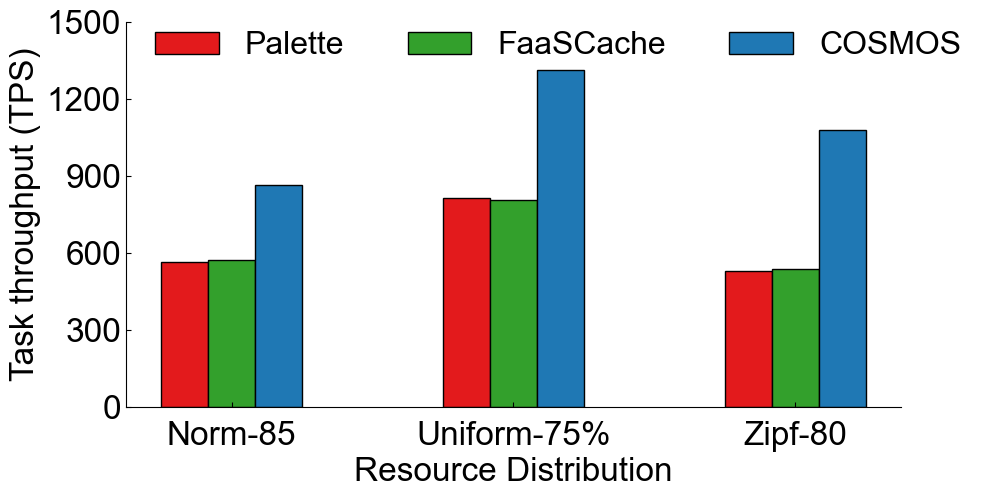

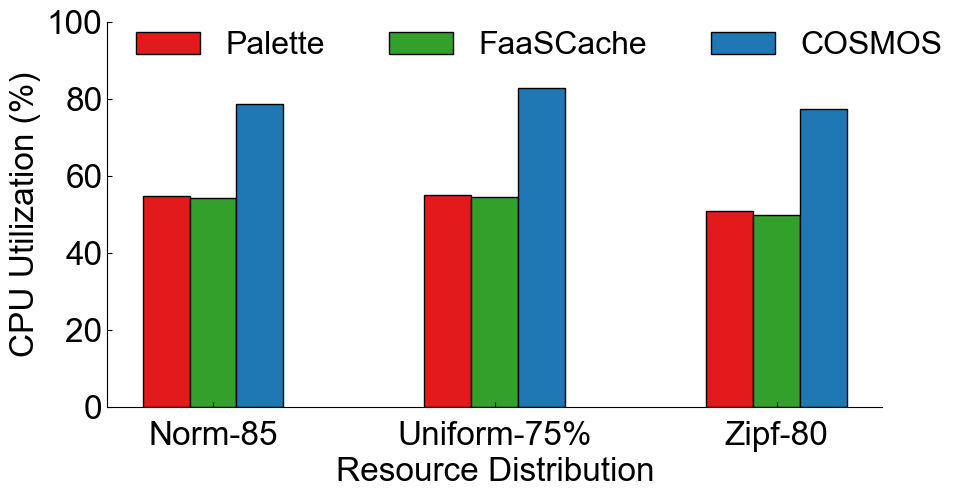

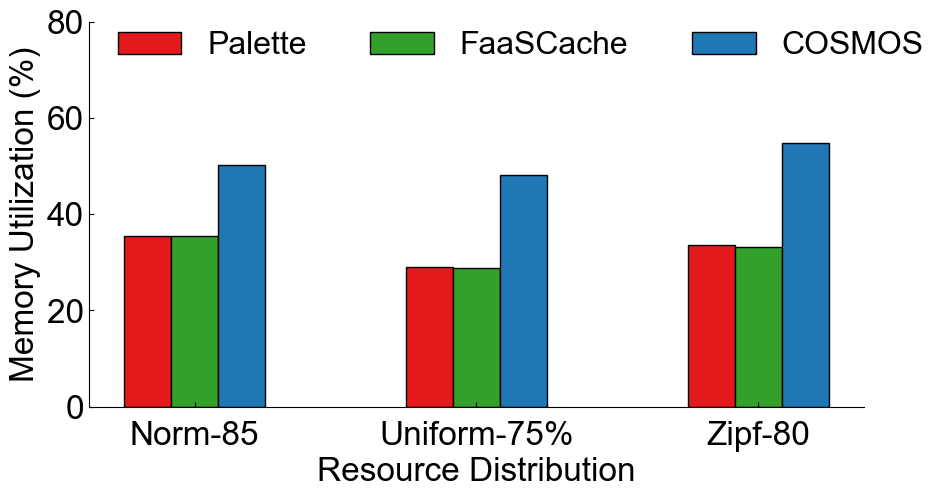

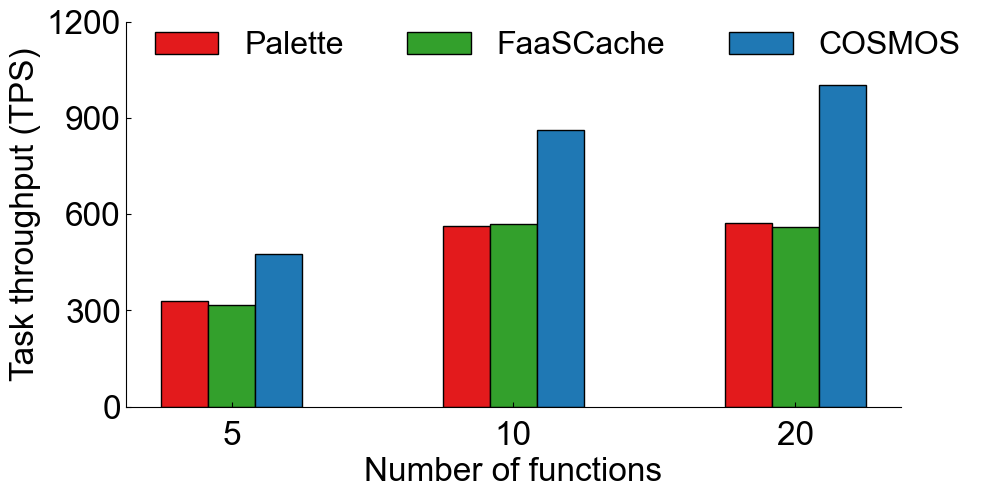

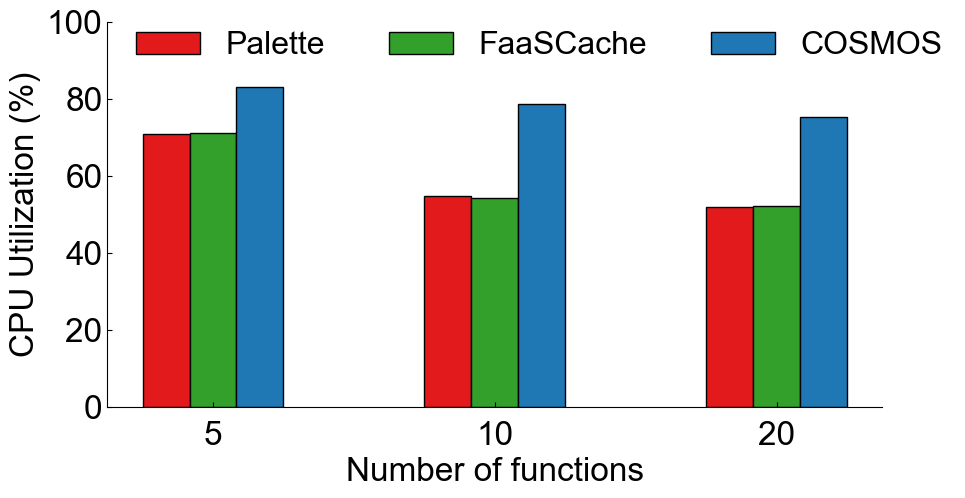

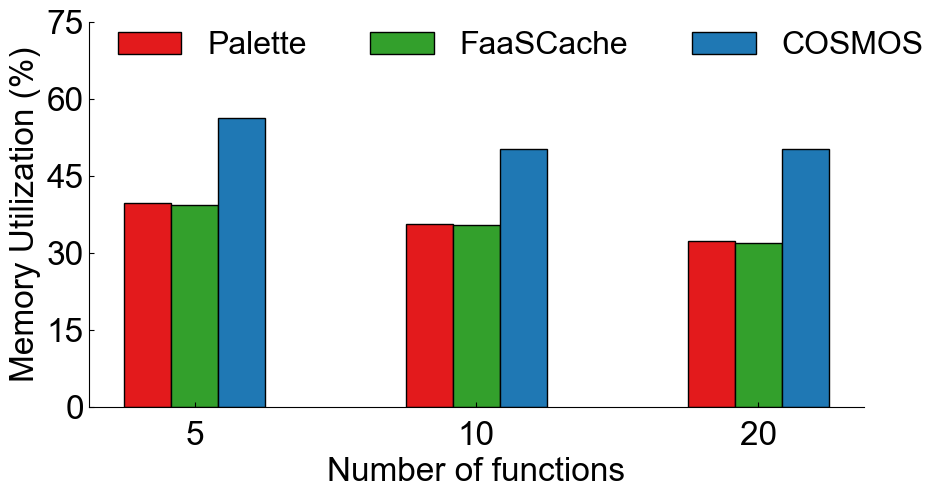

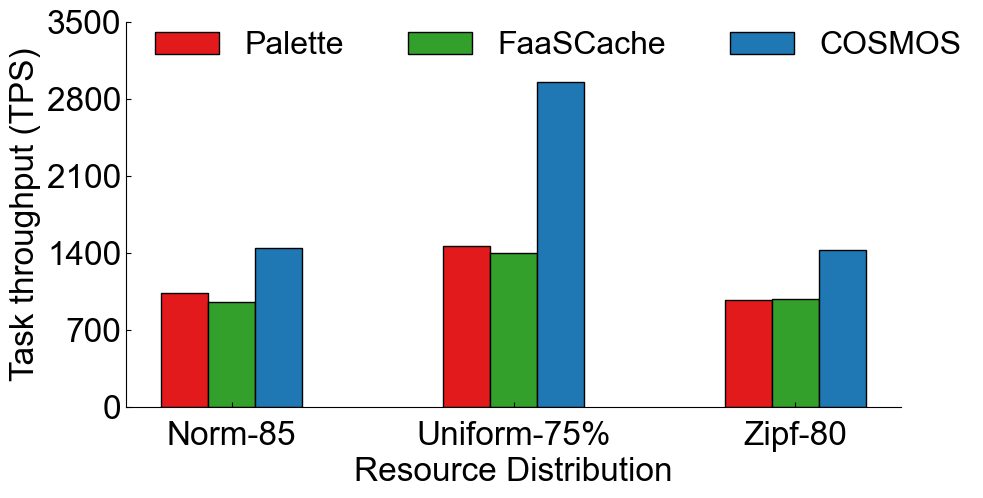

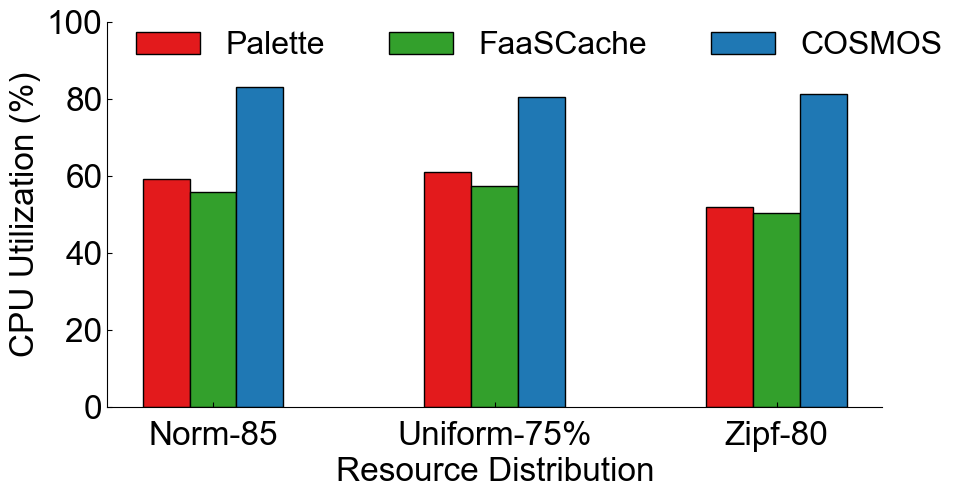

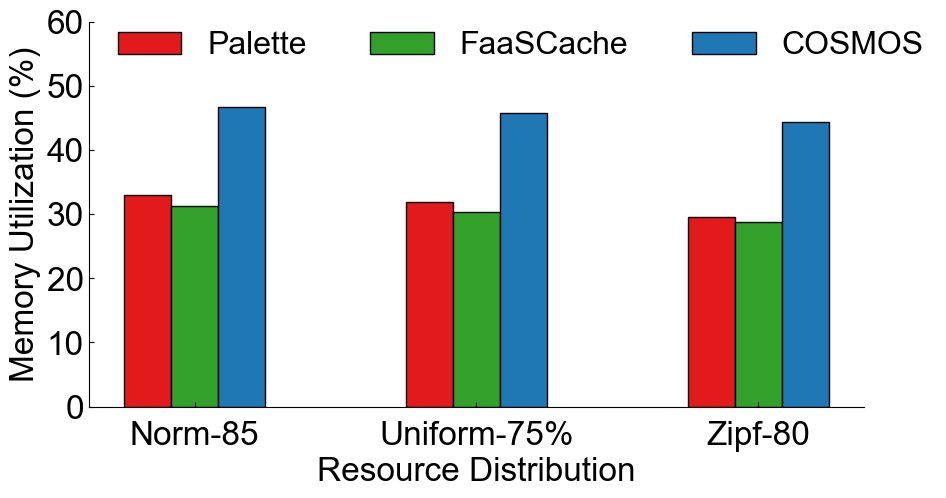

In [7]:
my_print(File.distribution, Title.Y_Task_Throughput, 
         [25902, 39290, 32335], [16866, 24334, 15873], [17095, 24112, 16030], 
         list(range(0, 1501, 300)))
my_print(File.distribution, Title.Y_Utilization_CPU, 
         [78.7, 82.80, 77.3], [54.8, 54.90, 50.8], [54.1, 54.40, 49.7], 
         list(range(0, 101, 20)))
my_print(File.distribution, Title.Y_Utilization_memory, 
         [50.2, 48.1, 54.8], [35.5, 29.1, 33.6], [35.4, 28.8, 33.1], 
         list(range(0, 81, 20)))

my_print(File.func_number, Title.Y_Task_Throughput, 
         [14295, 25902, 30061], [9844, 16866, 17134], [9463, 17095, 16796], 
         list(range(0, 1201, 300)))
my_print(File.func_number, Title.Y_Utilization_CPU, 
         [83.0, 78.7, 75.2], [70.7, 54.8, 51.9], [71.0, 54.1, 52.2], 
         list(range(0, 101, 20)))
my_print(File.func_number, Title.Y_Utilization_memory,
         [56.3, 50.2, 50.2], [39.7, 35.5, 32.30], [39.3, 35.4, 31.90], 
         list(range(0, 76, 15)))

my_print(File.big_cluster, Title.Y_Task_Throughput,
         [43342, 88490, 42781], [30905, 43894, 29175], [28639, 41988, 29228], 
         list(range(0, 3501, 700)))
my_print(File.big_cluster, Title.Y_Utilization_CPU,
         [83.0, 80.40, 81.2], [59.2, 61.00, 51.9], [55.8, 57.40, 50.2], 
         list(range(0, 101, 20)))
my_print(File.big_cluster, Title.Y_Utilization_memory,
         [46.7, 45.7, 44.3], [32.9, 31.9, 29.5], [31.2, 30.3, 28.8], 
         list(range(0, 61, 10)))

In [10]:
def my_print(y_label, y_list_my, y_list_base_p, y_list_base_f, y_list):
    font_size = 24
    plt.rc('font',**{'size': font_size})
    plt.rc('pdf',fonttype = 42)
    fig, ax = plt.subplots(figsize=(10, 5))
    
    distributions = [Title.X_Skew_uniform, Title.X_Skew_zipf]
    ax.set_xlabel(Title.X_Label_skew)
    if y_label == Title.Y_Task_Throughput:
        y_list_my = [i / 30 for i in y_list_my]
        y_list_base_p = [i / 30 for i in y_list_base_p]
        y_list_base_f = [i / 30 for i in y_list_base_f]
    ax.set_ylabel(y_label)
    
    x = np.arange(len(distributions))
    ax.xaxis.set_tick_params(pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(distributions)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_yaxis().set_tick_params(direction='in')
    ax.get_xaxis().set_tick_params(direction='in')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    bbox_location = None

    legend_list = [Legend.Baseline_P, Legend.Baseline_F, Legend.Our]
    color_list = [colors_red, colors_green, colors_blue]
    all_x = [y_list_base_p, y_list_base_f, y_list_my]
    ax.set_ylim(y_list[0], y_list[-1] + 0.001)
    ax.set_yticks(y_list)
    width = 0.4
    offset_list = [-width/3, 0, width/3]
    rect_list = []

    for x_data, color, offset in zip(all_x, color_list, offset_list):
        rect_list.append(ax.bar(x + offset, x_data, width / 3, edgecolor='black', color=color))
    
    ax.legend(rect_list, legend_list,
        frameon=False, ncol=3, loc='upper left',
            bbox_to_anchor=(0.0, 1.05) if not bbox_location else bbox_location,
            prop={'size': font_size-1})
    
    plt.savefig('./Eval/skew_%s.pdf' % (y_label), bbox_inches='tight')
    plt.show()

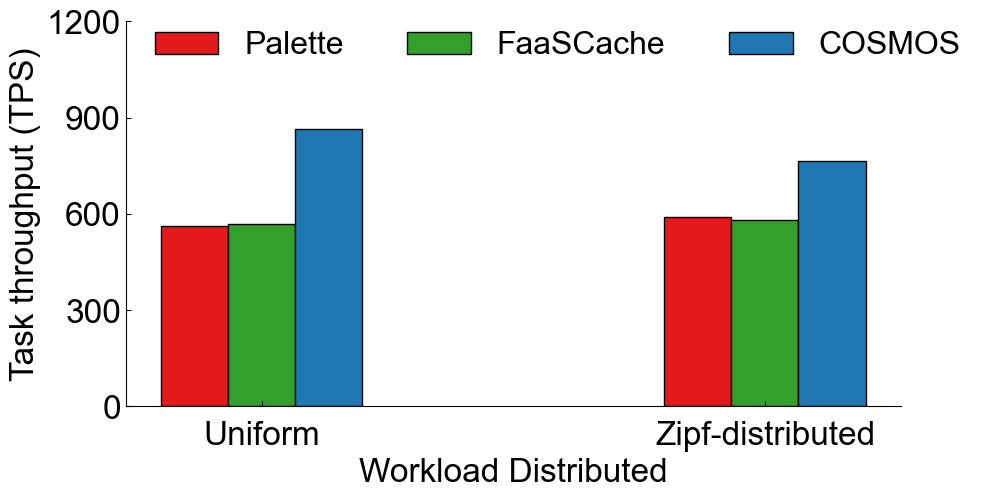

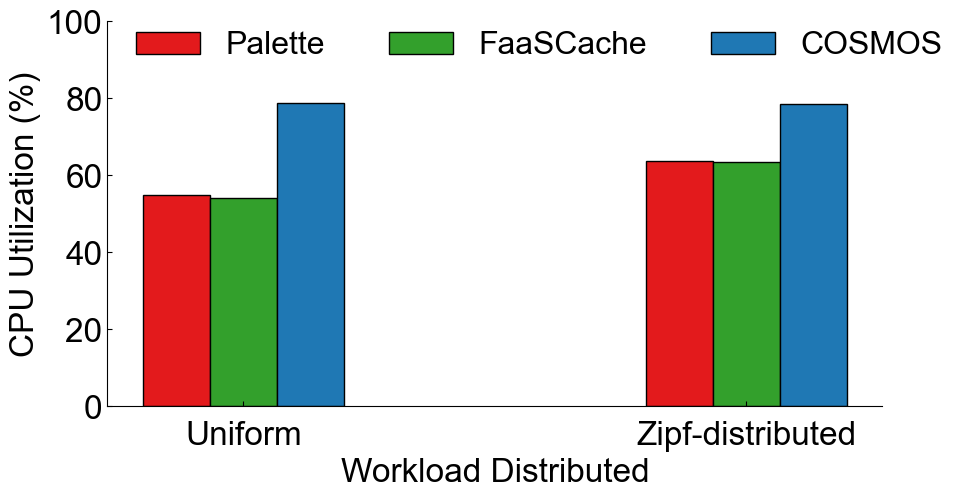

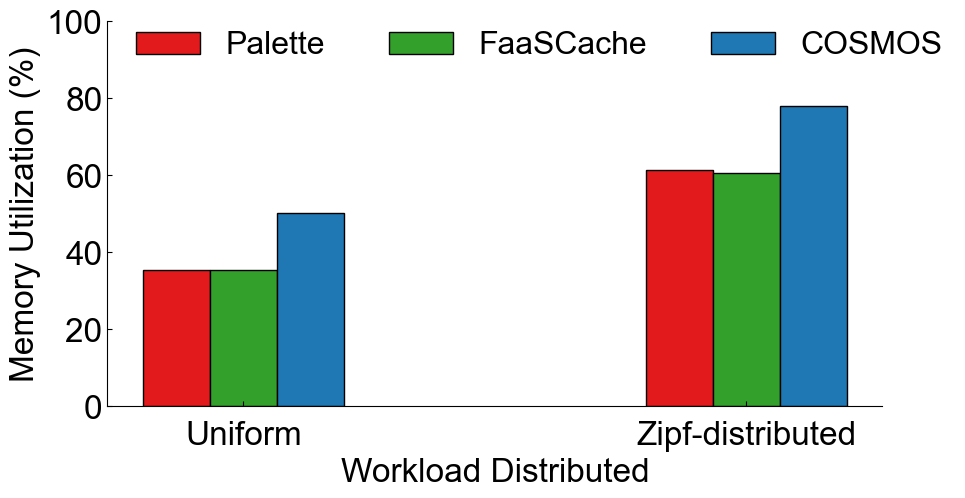

In [11]:
my_print(Title.Y_Task_Throughput, [25902, 22922], [16866, 17742], [17095, 17452], list(range(0, 1201, 300)))
my_print(Title.Y_Utilization_CPU, [78.7, 78.6], [54.8, 63.8], [54.1, 63.6], list(range(0, 101, 20)))
my_print(Title.Y_Utilization_memory, [50.2, 78.0], [35.5, 61.4], [35.4, 60.7], list(range(0, 101, 20)))

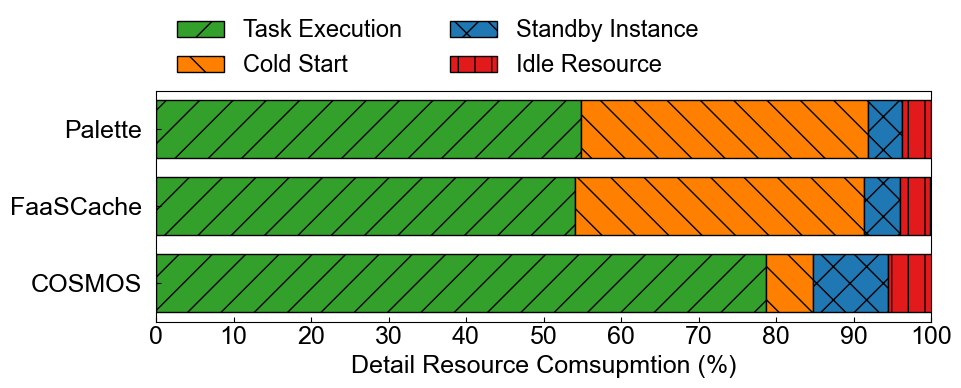

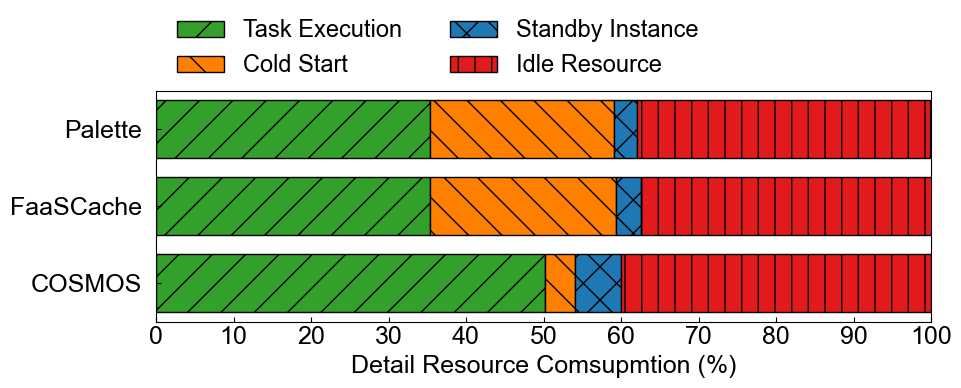

In [15]:
# 组图2 细分
def my_print_detail(duration_x, data_x, cold_x, queuing_x, file_name):
    
    font_size = 18
    plt.rc('font',**{'size': font_size})
    plt.rc('pdf',fonttype = 42)
    fig, ax = plt.subplots(figsize=(10, 3))
    
    x = [0.3, 0.5, 0.7]
    ax.set_yticks(x)
    ax.set_ylim([0.2, 0.8])
    distributions = [Legend.Our, Legend.Baseline_F, Legend.Baseline_P]
    ax.set_yticklabels(distributions)
    ax.set_xlabel("Detail Resource Comsupmtion (%)")
    ax.set_xlim(0, 100)
    ax.set_xticks(range(0, 101, 10))

    ax.yaxis.set_tick_params(pad=10)

    ax.get_yaxis().set_tick_params(direction='in')
    ax.get_xaxis().set_tick_params(direction='in')
    
    duration_x = np.array(duration_x)
    data_x = np.array(data_x)
    cold_x = np.array(cold_x)
    queuing_x = np.array(queuing_x)
    
    rect_list = []
    color_list = [colors_green, colors_orange, colors_blue, colors_red]
    all_x = [duration_x, data_x, cold_x, queuing_x]
    all_hatch = ['/', '\\', 'x', '|']
    for index, (y, color, hatch) in enumerate(zip(all_x, color_list, all_hatch)):
        rect_list.append(ax.barh(x, width=y, height=0.15, edgecolor='black', color=color, left=sum(all_x[:index]), hatch=hatch))

    ax.legend(rect_list, [Legend.Util_Task_execution, Legend.Util_Cold_start, Legend.Util_Container_idle, Legend.Util_Resource_idle],
        frameon=False, ncol=2, loc='upper left',
            bbox_to_anchor=(0.0, 1.4),
            prop={'size': font_size-1})
    
    plt.savefig('./Eval/%s.pdf' % file_name, bbox_inches='tight')
    plt.show()

# [Legend.Baseline_F, Legend.Baseline_P, Legend.Our]
# [Legend.Util_Task_execution, Legend.Util_Cold_start, Legend.Util_Container_idle, Legend.Util_Resource_idle],
my_print_detail(
    [78.70, 54.10, 54.80],
    [6.10, 37.30, 37.10],
    [9.70, 4.60, 4.30],
    [ 5.60, 3.90, 3.80],
    File.detail_cpu
)

my_print_detail(
    [50.20, 35.40, 35.40],
    [3.90, 24.00, 23.70],
    [5.90, 3.20, 3.00],
    [40.00, 37.50, 37.80],
    File.detail_memory
)



In [ ]:
# 组图6 大规模试验-数据处理
import re

def parse_log_data(log_text):
    """
    解析log数据，返回按worker_number组织的字典
    """
    data_dict = {}
    
    # 使用正则表达式匹配数据
    pattern = r'worker_number (\d+), test_frequency (\d+):\s*average placement time:\s*([\d.]+)\s*seconds\s*average scheduling time:\s*([\d.]+)\s*seconds'
    
    matches = re.findall(pattern, log_text)
    
    for match in matches:
        worker_num = int(match[0])
        test_freq = int(match[1])
        placement_time = float(match[2]) * 1000
        scheduling_time = float(match[3]) * 1000
        
        # 如果该worker_number还没有在字典中，创建对应的数据结构
        if worker_num not in data_dict:
            data_dict[worker_num] = {
                'test_frequency': [],
                'average_placement': [],
                'average_scheduling': []
            }
        
        # 添加数据到对应的list中
        data_dict[worker_num]['test_frequency'].append(test_freq)
        data_dict[worker_num]['average_placement'].append(placement_time)
        data_dict[worker_num]['average_scheduling'].append(scheduling_time)
    
    return data_dict

def parse_log_file(filename):
    """
    从文件解析log数据
    """
    with open(filename, 'r') as file:
        log_text = file.read()
    return parse_log_data(log_text)

# 解析数据
parsed_data = parse_log_file("./overhead.log")

# 输出结果
for worker_num, data in parsed_data.items():
    print(f"worker_number {worker_num}:")
    print(f"  test_frequency: {data['test_frequency']}")
    print(f"  average_placement: {data['average_placement']}")
    print(f"  average_scheduling: {data['average_scheduling']}")
    print()

worker_number 32:
  test_frequency: [100, 231, 362, 493, 624, 755, 886, 1017, 1148, 1279, 1410, 1541, 1672, 1803, 1934, 2065, 2196, 2327, 2458, 2589, 2720, 2851, 2982, 3113, 3244, 3375, 3506, 3637, 3768, 3899, 4030, 4161, 4292, 4423, 4554, 4685, 4816, 4947, 5078, 5209, 5340, 5471, 5602, 5733, 5864, 5995, 6126, 6257, 6388, 6519, 6650, 6781, 6912, 7043, 7174, 7305, 7436, 7567, 7698, 7829, 7960]
  average_placement: [9.399056434631348, 10.875582695007324, 9.744207064310709, 10.577996571858725, 8.781035741170248, 11.588811874389648, 8.999149004618326, 11.476635932922363, 9.775082270304361, 11.768738428751627, 9.771227836608887, 10.593771934509277, 9.8801056543986, 11.284589767456055, 11.56008243560791, 10.840733846028646, 9.135802586873373, 11.631647745768229, 10.071118672688803, 12.41302490234375, 11.07350985209147, 11.363903681437174, 10.736862818400065, 10.431766510009766, 11.202653249104818, 10.083556175231934, 11.229674021402994, 10.561982790629068, 11.281331380208334, 10.581056276957

In [9]:
parsed_data = {
    32:{
    "test_frequency": [100, 231, 362, 493, 624, 755, 886, 1017, 1148, 1279, 1410, 1541, 1672, 1803, 1934, 2065, 2196, 2327, 2458, 2589, 2720, 2851, 2982, 3113, 3244, 3375, 3506, 3637, 3768, 3899, 4030, 4161, 4292, 4423, 4554, 4685, 4816, 4947, 5078, 5209, 5340, 5471, 5602, 5733, 5864, 5995, 6126, 6257, 6388, 6519, 6650, 6781, 6912, 7043, 7174, 7305, 7436, 7567, 7698, 7829, 7960],
    "average_placement": [9.399056434631348, 10.875582695007324, 9.744207064310709, 10.577996571858725, 8.781035741170248, 11.588811874389648, 8.999149004618326, 11.476635932922363, 9.775082270304361, 11.768738428751627, 9.771227836608887, 10.593771934509277, 9.8801056543986, 11.284589767456055, 11.56008243560791, 10.840733846028646, 9.135802586873373, 11.631647745768229, 10.071118672688803, 12.41302490234375, 11.07350985209147, 11.363903681437174, 10.736862818400065, 10.431766510009766, 11.202653249104818, 10.083556175231934, 11.229674021402994, 10.561982790629068, 11.281331380208334, 10.581056276957193, 11.785507202148438, 11.162837346394857, 10.854045550028482, 9.996136029561361, 10.982076327006022, 10.640501976013184, 10.278662045796713, 11.21973991394043, 10.590632756551107, 11.824369430541992, 11.161168416341146, 8.946657180786133, 7.950981458028158, 9.886940320332846, 11.692126592000326, 11.689464251200357, 10.630528132120768, 10.611573855082193, 10.639270146687826, 9.776552518208822, 11.056820551554361, 10.735789934794107, 11.73865795135498, 9.563008944193522, 11.134823163350424, 10.378599166870117, 11.16788387298584, 9.240309397379557, 10.514616966247559, 9.975552558898926, 10.89163621266683],
    "average_scheduling": [0.5262808799743652, 0.6059672832489014, 0.6232571601867676, 0.6107478141784668, 0.6166176795959473, 0.5445404052734375, 0.6034457683563232, 0.6124861240386963, 0.6084928512573242, 0.6286866664886475, 0.6033484935760498, 0.6150760650634766, 0.6192471981048584, 0.606027364730835, 0.6089129447937012, 0.6082570552825928, 0.6028923988342285, 0.7161445617675781, 0.6110787391662598, 0.6086325645446777, 0.6112527847290039, 0.6154994964599609, 0.6105291843414307, 0.6165835857391357, 0.608083963394165, 0.6102478504180908, 0.6143107414245605, 0.6129531860351562, 0.6076152324676514, 0.6092767715454102, 0.6192142963409424, 0.6087117195129395, 0.6067314147949219, 0.6051030158996582, 0.6165943145751953, 0.6144812107086182, 0.6154060363769531, 0.6040048599243164, 0.614910364151001, 0.6194512844085693, 0.6161670684814453, 0.6110644340515137, 0.6557981967926025, 0.613044023513794, 0.6121561527252197, 0.6194186210632324, 0.6076321601867676, 0.6100420951843262, 0.6140201091766357, 0.5431621074676514, 0.613673210144043, 0.6114480495452881, 0.6133997440338135, 0.6178762912750244, 0.6122970581054688, 0.6166477203369141, 0.6071410179138184, 0.6027097702026367, 0.6103541851043701, 0.6462795734405518, 0.6115155220031738]
    }, 64:{
    "test_frequency": [100, 365, 630, 895, 1160, 1425, 1690, 1955, 2220, 2485, 2750, 3015, 3280, 3545, 3810, 4075, 4340, 4605, 4870, 5135, 5400, 5665, 5930, 6195, 6460, 6725, 6990, 7255, 7520, 7785, 8050, 8315, 8580, 8845, 9110, 9375, 9640, 9905, 10170, 10435, 10700, 10965, 11230, 11495, 11760, 12025, 12290, 12555, 12820, 13085, 13350, 13615, 13880, 14145, 14410, 14675, 14940, 15205, 15470, 15735],
    "average_placement": [14.31735356648763, 16.792019208272297, 17.741680145263672, 17.535607020060223, 16.129692395528156, 17.339309056599934, 17.770846684773762, 17.969727516174316, 15.692869822184246, 16.02669556935628, 18.056591351826984, 16.600171724955242, 17.77172088623047, 17.401496569315594, 15.720407168070476, 17.919460932413738, 16.21564229329427, 19.013603528340656, 15.994548797607422, 16.148487726847332, 16.591111818949383, 14.762481053670248, 18.723448117574055, 14.467954635620117, 15.6022310256958, 15.98648230234782, 16.536474227905273, 15.501737594604492, 19.535382588704426, 17.56628354390462, 14.952580134073893, 16.621510187784832, 18.238306045532227, 18.431703249613445, 17.17642943064372, 17.572601636250813, 15.798687934875488, 16.113917032877605, 17.66522725423177, 17.212271690368652, 17.84674326578776, 15.30019442240397, 17.45593547821045, 17.300208409627277, 15.999754269917805, 18.15954844156901, 16.67797565460205, 14.560222625732422, 15.519499778747559, 17.23655064900716, 17.193039258321125, 15.701969464619953, 16.56162738800049, 17.103195190429688, 18.44354470570882, 15.98048210144043, 15.638669331868488, 19.58151658376058, 16.62886142730713, 14.801263809204102],
    "average_scheduling": [0.8332479000091553, 0.8065218925476074, 0.8117039203643799, 0.7813596725463867, 0.8028755187988281, 0.811873197555542, 0.7876331806182861, 0.8026590347290039, 0.7817990779876709, 0.7915022373199463, 0.8062820434570312, 0.7894110679626465, 0.8088610172271729, 0.803126335144043, 0.7197456359863281, 0.797987699508667, 0.8041062355041504, 0.8066394329071045, 0.7924020290374756, 0.8013584613800049, 0.8087632656097412, 0.7835779190063477, 0.8129305839538574, 0.8161864280700684, 0.7565100193023682, 0.7860753536224365, 0.814002513885498, 0.8129069805145264, 0.8162262439727783, 0.7989616394042969, 0.7854127883911133, 0.7866618633270264, 0.811417818069458, 0.8080170154571533, 0.8058090209960938, 0.8105182647705078, 0.8245933055877686, 0.8003382682800293, 0.7982468605041504, 0.8058979511260986, 0.807767391204834, 0.8038375377655029, 0.8288693428039551, 0.8056466579437256, 0.7978897094726562, 0.7805271148681641, 0.8034029006958008, 0.8003003597259521, 0.8036658763885498, 0.8132143020629883, 0.7950706481933594, 0.8209741115570068, 0.7804319858551025, 0.7853643894195557, 0.81475830078125, 0.8067522048950195, 0.7747704982757568, 0.7767939567565918, 0.7933049201965332, 0.7976744174957275]
    }, 128:{
    "test_frequency": [100, 631, 1162, 1693, 2224, 2755, 3286, 3817, 4348, 4879, 5410, 5941, 6472, 7003, 7534, 8065, 8596, 9127, 9658, 10189, 10720, 11251, 11782, 12313, 12844, 13375, 13906, 14437, 14968, 15499, 16030, 16561, 17092, 17623, 18154, 18685, 19216, 19747, 20278, 20809, 21340, 21871, 22402, 22933, 23464, 23995, 24526, 25057, 25588, 26119, 26650, 27181, 27712, 28243, 28774, 29305, 29836, 30367, 30898, 31429, 31960],
    "average_placement": [18.784403800964355, 30.053059260050457, 25.941212972005207, 29.767274856567383, 25.920510292053223, 29.054443041483562, 28.589407602945965, 31.070987383524578, 28.543551762898762, 25.585611661275227, 32.0893923441569, 28.96749973297119, 30.58473269144694, 28.155843416849773, 30.97093105316162, 31.28993511199951, 30.835986137390137, 29.025157292683918, 26.033401489257812, 32.42250283559164, 32.70407517751058, 33.1957737604777, 28.151671091715496, 30.211329460144043, 30.28980890909831, 24.272441864013672, 25.172869364420574, 30.142823855082195, 32.016634941101074, 31.266887982686363, 24.320483207702637, 30.927737553914387, 30.028581619262695, 27.617812156677246, 28.433720270792644, 30.07503350575765, 27.43288548787435, 30.123591423034668, 29.24668788909912, 28.119206428527832, 27.00328826904297, 26.6185204188029, 29.55949306488037, 30.04642327626546, 29.757380485534668, 29.718756675720215, 24.628400802612305, 28.79337469736735, 29.81571356455485, 29.558976491292317, 27.402559916178387, 26.30138397216797, 27.308980623881023, 27.013858159383137, 35.042802492777504, 32.547553380330406, 31.879901885986328, 30.765652656555176, 29.918551445007324, 26.822209358215332, 30.445138613382976],
    "average_scheduling": [1.2670302391052246, 1.2629072666168213, 1.1802783012390137, 1.2826578617095947, 1.2461938858032227, 1.221989631652832, 1.2584896087646484, 1.2306079864501953, 1.2597339153289795, 1.2868578433990479, 1.246852159500122, 1.2739951610565186, 1.223632574081421, 1.2623612880706787, 1.2767236232757568, 1.2132928371429443, 1.2427067756652832, 1.1950476169586182, 1.2543818950653076, 1.2527990341186523, 1.232961893081665, 1.2661261558532715, 1.2595336437225342, 1.2863895893096924, 1.2043800354003906, 1.2514266967773438, 1.2473907470703125, 1.2524864673614502, 1.2511229515075684, 1.2338817119598389, 1.2456693649291992, 1.225616693496704, 1.2829887866973877, 1.2967848777770996, 1.2440438270568848, 1.2641892433166504, 1.2337360382080078, 1.2755792140960693, 1.2824585437774658, 1.224118947982788, 1.2516067028045654, 1.2839248180389404, 1.2804782390594482, 1.2491240501403809, 1.2031259536743164, 1.215709924697876, 1.2576467990875244, 1.2833573818206787, 1.2081215381622314, 1.2811005115509033, 1.2317171096801758, 1.193131685256958, 1.2141757011413574, 1.2544782161712646, 1.2352573871612549, 1.1968185901641846, 1.2667515277862549, 1.2589972019195557, 1.2731873989105225, 1.282186508178711, 1.2540290355682373]
    }, 256:{
    "test_frequency": [100, 1165, 2230, 3295, 4360, 5425, 6490, 7555, 8620, 9685, 10750, 11815, 12880, 13945, 15010, 16075, 17140, 18205, 19270, 20335, 21400, 22465, 23530, 24595, 25660, 26725, 27790, 28855, 29920, 30985, 32050, 33115, 34180, 35245, 36310, 37375, 38440, 39505, 40570, 41635, 42700, 43765, 44830, 45895, 46960, 48025, 49090, 50155, 51220, 52285, 53350, 54415, 55480, 56545, 57610, 58675, 59740, 60805, 61870, 62935],
    "average_placement": [36.88234933217366, 40.615479151407875, 39.46358807881673, 39.50165557861328, 43.00848642985026, 37.397532145182296, 41.46528244018555, 39.133815447489425, 40.888309478759766, 38.43826897939046, 38.271614392598465, 43.228705724080406, 38.52775541941325, 41.43834114074707, 37.416446685791016, 35.827954610188804, 38.32525857289632, 38.83567301432292, 43.63512992858887, 39.78239345550537, 40.993690490722656, 36.23639392852783, 39.95180130004883, 36.83613586425781, 38.54567654927571, 42.33769575754801, 38.587399800618485, 41.852752367655434, 38.255799293518066, 40.66685835520426, 39.828090349833175, 38.456786155700684, 42.60822137196859, 38.864362716674805, 41.2741502126058, 37.2232084274292, 42.41621494293213, 39.114463806152344, 37.15267626444499, 39.41182295481364, 36.37280909220378, 42.040626207987465, 38.52652359008789, 40.28010368347168, 39.00451310475667, 38.163372357686356, 42.16571648915609, 37.88883336385091, 40.47346115112305, 39.122450828552246, 41.870435078938804, 37.18919404347737, 38.89293320973714, 41.51773452758789, 39.578307151794434, 39.89581267038981, 39.525934537251786, 40.36192099253336, 38.31079451243083, 36.39430650075276],
    "average_scheduling": [2.450927495956421, 2.415349006652832, 2.464855909347534, 2.41239333152771, 2.424527168273926, 2.502835750579834, 2.429809808731079, 2.4272301197052, 2.4373185634613037, 2.428807258605957, 2.4554922580718994, 2.401019811630249, 2.4188108444213867, 2.4217162132263184, 2.450932025909424, 2.451653480529785, 2.414856195449829, 2.450981616973877, 2.3955676555633545, 2.4553327560424805, 2.4113824367523193, 2.4145145416259766, 2.416887044906616, 2.4758498668670654, 2.492403507232666, 2.3630454540252686, 2.4827935695648193, 2.422609329223633, 2.405160427093506, 2.431201934814453, 2.4454054832458496, 2.4491612911224365, 2.3452563285827637, 2.405658006668091, 2.3768224716186523, 2.4321746826171875, 2.478865385055542, 2.368929386138916, 2.4286015033721924, 2.315058469772339, 2.410855293273926, 2.3869500160217285, 2.493010997772217, 2.4751338958740234, 2.4393506050109863, 2.465305805206299, 2.4106686115264893, 2.45395827293396, 2.428635358810425, 2.4685797691345215, 2.4590227603912354, 2.4510395526885986, 2.427753210067749, 2.3824992179870605, 2.433795213699341, 2.402215003967285, 2.486969470977783, 2.415174961090088, 2.4349958896636963, 2.43546199798584]
    }, 512:{
    "test_frequency": [100, 2231, 4362, 6493, 8624, 10755, 12886, 15017, 17148, 19279, 21410, 23541, 25672, 27803, 29934, 32065, 34196, 36327, 38458, 40589, 42720, 44851, 46982, 49113, 51244, 53375, 55506, 57637, 59768, 61899, 64030, 66161, 68292, 70423, 72554, 74685, 76816, 78947, 81078, 83209, 85340, 87471, 89602, 91733, 93864, 95995, 98126, 100257, 102388, 104519, 106650, 108781, 110912, 113043, 115174, 117305, 119436, 121567, 123698, 125829, 127960],
    "average_placement": [65.02209027608237, 64.8988676071167, 65.41500409444174, 64.09341017405191, 65.3257163365682, 61.70540968577067, 62.25492477416992, 66.84046904246011, 66.50757789611816, 65.05777359008789, 65.15010197957356, 63.13842455546061, 65.89142481486003, 62.14978218078613, 66.66175524393718, 63.77758502960205, 65.29545783996582, 60.99794228871664, 62.10726420084635, 64.70670223236084, 66.92735354105632, 60.51812489827474, 59.931694666544594, 61.0460631052653, 64.83771324157715, 65.99978605906169, 65.60991128285727, 68.28884283701579, 62.04078515370687, 61.63201649983724, 67.37438837687175, 64.45072015126547, 65.35762468973795, 67.20157464345296, 63.13993453979492, 67.6579475402832, 65.76651255289713, 65.28196652730307, 66.63219134012859, 63.693224589029946, 65.5365784962972, 64.25891240437826, 63.405493100484215, 69.11102930704753, 64.20983791351318, 65.3049341837565, 64.66092586517334, 64.7913408279419, 65.79134782155356, 65.40268580118814, 62.86634922027588, 64.32904720306396, 62.81453291575114, 62.05926259358724, 64.99566555023193, 64.5344845453898, 64.73992188771567, 62.63746738433838, 66.01283868153891, 58.05426756540934, 64.09960905710855],
    "average_scheduling": [4.337383985519409, 4.417891263961792, 4.542319059371948, 4.385587453842163, 4.424231767654419, 4.4333415031433105, 4.475488901138306, 4.403507232666016, 4.4203572273254395, 4.422537803649902, 4.438907623291016, 4.526054620742798, 4.473569869995117, 4.58900785446167, 4.54806923866272, 4.39566445350647, 4.491208791732788, 4.425469636917114, 4.518179416656494, 4.65428900718689, 4.510812520980835, 4.455342531204224, 4.488213539123535, 4.476198434829712, 4.4330360889434814, 4.460250377655029, 4.432145357131958, 4.4895265102386475, 4.461184024810791, 4.431673288345337, 4.416229486465454, 4.415406942367554, 4.51501202583313, 4.422533988952637, 4.4664342403411865, 4.465202808380127, 4.49085259437561, 4.53140926361084, 4.503608465194702, 4.4997992515563965, 4.389677286148071, 4.5005364418029785, 4.472118854522705, 4.524430751800537, 4.489905118942261, 4.556933164596558, 4.4824957847595215, 4.4875218868255615, 4.467025518417358, 4.429056406021118, 4.503459453582764, 4.477418899536133, 4.523949146270752, 4.529919147491455, 4.5905396938323975, 4.548396587371826, 4.494543075561523, 4.502057313919067, 4.652639389038086, 4.606354713439941, 4.5250084400177]
    }, 1024:{
    "test_frequency": [100, 4365, 8630, 12895, 17160, 21425, 25690, 29955, 34220, 38485, 42750, 47015, 51280, 55545, 59810, 64075, 68340, 72605, 76870, 81135, 85400, 89665, 93930, 98195, 102460, 106725, 110990, 115255, 119520, 123785, 128050, 132315, 136580, 140845, 145110, 149375, 153640, 157905, 162170, 166435, 170700, 174965, 179230, 183495, 187760, 192025, 196290, 200555, 204820, 209085, 213350, 217615, 221880, 226145, 230410, 234675, 238940, 243205, 247470, 251735],
    "average_placement": [98.9789851506551, 99.79513168334961, 99.80701287587483, 101.0686445236206, 92.5310452779134, 93.78674507141113, 99.51530774434407, 100.23660341898601, 98.19089253743489, 98.74887148539226, 98.33569208780925, 106.0187816619873, 103.67119312286377, 92.82953421274821, 98.08185577392578, 87.94143676757812, 100.44943173726399, 87.80700842539468, 100.68844636281331, 105.87497552235921, 105.64510027567546, 100.05834579467773, 99.78905200958252, 92.78173128763835, 94.52707449595134, 100.15061378479004, 97.19382603963216, 103.86951764424641, 103.85461648305257, 100.17652193705241, 102.23856449127197, 100.17183303833008, 102.19290733337402, 98.92271836598714, 98.22752952575684, 103.87094815572102, 100.45746962229411, 100.07269064585368, 102.0671812693278, 97.8325096766154, 97.71651903788249, 99.75722312927246, 98.56513023376465, 106.15766048431396, 106.16989930470784, 93.95355860392253, 101.27249240875244, 96.48000081380208, 97.3074722290039, 101.51166598002116, 96.49994850158691, 103.11094919840495, 102.28387514750163, 98.4494177500407, 101.29589716593425, 97.38471984863281, 93.49718570709229, 100.74995835622151, 102.67876466115315, 107.29797681172688],
    "average_scheduling": [8.754447221755981, 8.859582901000977, 9.105609655380249, 8.899378538131714, 9.087606430053711, 9.440971612930298, 8.949928283691406, 9.041017770767212, 9.108910322189331, 8.908225536346436, 9.146017789840698, 9.146409749984741, 9.141509294509888, 9.854105710983276, 8.98992657661438, 9.42483401298523, 8.945698976516724, 9.131211757659912, 9.158557415008545, 9.714385032653809, 9.645504474639893, 9.892549276351929, 9.461965560913086, 9.625299453735352, 9.375267744064331, 9.510706901550293, 9.235974550247192, 8.970633268356323, 8.938114404678345, 8.973632574081421, 9.2257559299469, 9.06166410446167, 9.081580638885498, 9.013943195343018, 9.394303321838379, 8.991926670074463, 8.99258804321289, 8.999232053756714, 9.053646326065063, 9.478171348571777, 9.210728645324707, 9.047217845916748, 9.011592626571655, 9.165659666061401, 9.239864349365234, 9.21112322807312, 9.502953052520752, 9.536182880401611, 9.518755197525024, 9.569760799407959, 9.119795083999634, 9.075873136520386, 9.26643705368042, 9.20849871635437, 9.114689350128174, 9.294700145721436, 9.684231042861938, 9.129185199737549, 9.933165550231934, 9.056679725646973]}
}

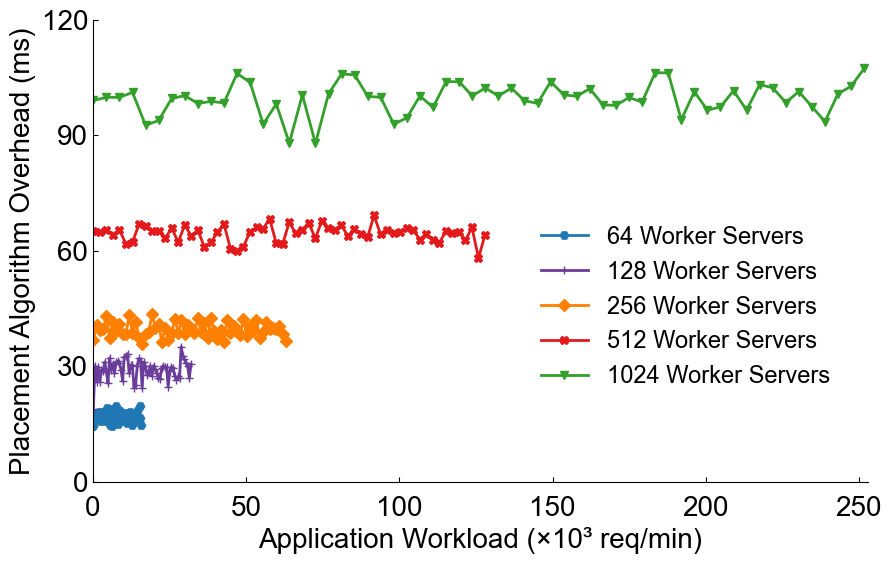

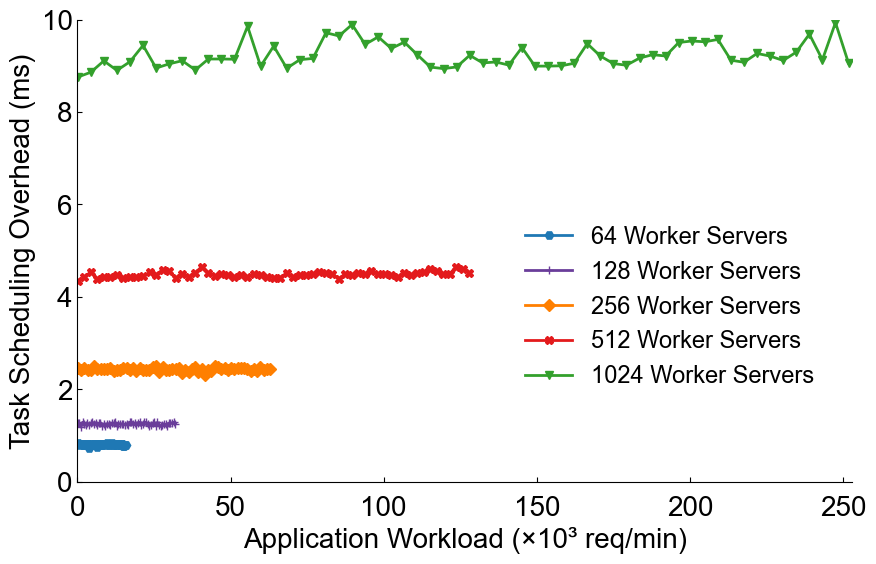

In [21]:
# 组图6 大规模试验-模拟
def overhead(title):
    font_size = 20
    plt.rc('font',**{'size': font_size})
    plt.rc('pdf',fonttype = 42)
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.set_xlabel("Application Workload (×10³ req/min)")
    ax.xaxis.set_tick_params(pad=10)
    # plt.yscale('log')
    ax.set_xlim(1, 253)
    ax.set_xticks(range(0, 251, 50))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.get_yaxis().set_tick_params(direction='in')
    ax.get_xaxis().set_tick_params(direction='in')

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    if title == File.overhead_p:
        ax.set_ylabel("Placement Algorithm Overhead (ms)")
        data_label = 'average_placement'
        ax.set_yticks(range(0, 121, 30))
        ax.set_ylim(0, 120)
    else:
        ax.set_ylabel("Task Scheduling Overhead (ms)")
        data_label = 'average_scheduling'
        ax.set_yticks(range(0, 11, 2))
        ax.set_ylim(0, 10)
    
    rect_list = []
    x_list = [64, 128, 256, 512, 1024]
    mark_list = ['H', '+', 'D', 'X', 'v', 'o', '^']
    legend_list = ['%d Worker Servers' % i for i in x_list]
    color_list = [colors_blue, colors_purple, colors_orange, colors_red, colors_green]
    for x, color, mark, legend in zip(x_list, color_list, mark_list, legend_list):
        x_list= [i / 1000 for i in parsed_data[x]['test_frequency']]
        rect_list.append(ax.plot(x_list, parsed_data[x][data_label], color=color, linestyle='-', linewidth=2, marker=mark, label=legend))
    
    ax.legend(frameon=False, ncol=1, loc='upper left',
        bbox_to_anchor=(0.55, 0.6), prop={'size': font_size-3})
    
    plt.savefig('./Eval/%s.pdf' % title, bbox_inches='tight')
    plt.show()

overhead(title=File.overhead_p)
overhead(title=File.overhead_s)

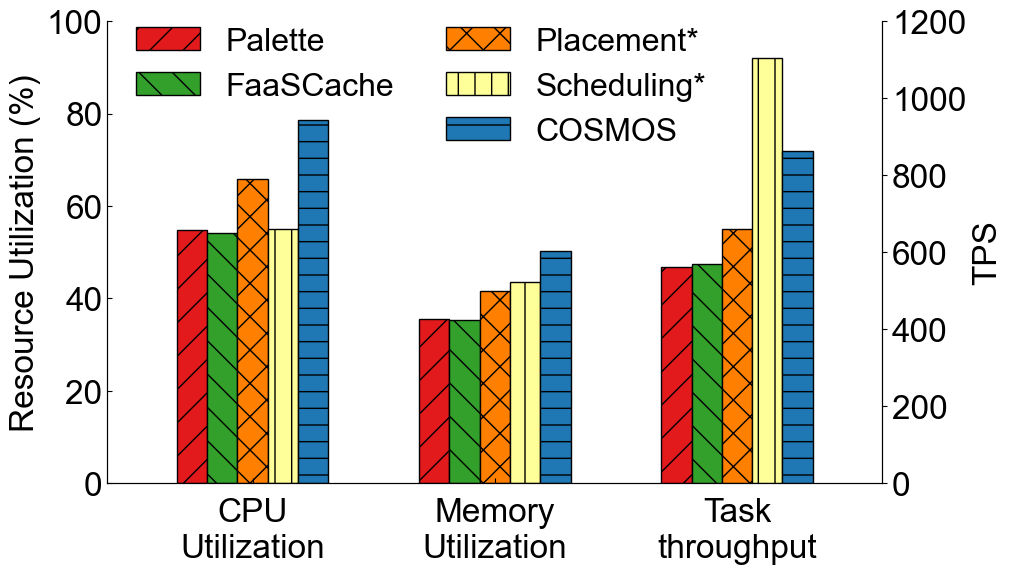

In [19]:
# 组图7 消融实验
def my_print(util_my, util_place, util_scheduling, util_base_p, util_base_f, all_throughput, y_list1, y_list2):
    target_file_type = "pdf"
    font_size = 24
    plt.rc('font',**{'size': font_size})
    plt.rc('pdf',fonttype = 42)
    fig, ax = plt.subplots(figsize=(10, 6))

    x_labels = ["CPU\nUtilization", "Memory\nUtilization"]
    
    util_my = np.array(util_my)
    util_base_f = np.array(util_base_f)
    util_place = np.array(util_place)
    util_scheduling = np.array(util_scheduling)
    util_base_p = np.array(util_base_p)
    
    x = np.arange(len(x_labels) + 1)
    ax.xaxis.set_tick_params(pad=10)
    ax.set_xticks(x)
    ax.set_xlim(-0.6, 2.6)
    ax.set_xticklabels(x_labels + ["Task\nthroughput"])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(True)

    ax.get_yaxis().set_tick_params(direction='in')
    ax.get_xaxis().set_tick_params(direction='in')

    ax.spines['top'].set_color('none')
    
    ax.set_ylim(y_list1[0], y_list1[-1])
    ax.set_yticks(y_list1)
    ax.set_ylabel("Resource Utilization (%)")
    ax1 = ax.twinx()
    ax1.yaxis.set_label_position("right")
    ax1.set_ylim(y_list2[0], y_list2[-1])
    ax1.set_yticks(y_list2)
    ax1.set_ylabel("TPS")
    ax1.spines['top'].set_color('none')
    
    rect_list = []
    width = 0.125
    x = np.arange(len(x_labels))
    all_hatch = ['/', '\\', 'x', '|', '-']
    rect_list.append(ax.bar(x - width * 2, util_base_p, width, edgecolor='black', color=colors_red, hatch=all_hatch[0]))
    rect_list.append(ax.bar(x - width * 1, util_base_f, width, edgecolor='black', color=colors_green, hatch=all_hatch[1]))
    ax.bar(x, util_place, width, edgecolor='black', color=colors_orange, hatch=all_hatch[2])
    ax.bar(x + width * 1, util_scheduling, width, edgecolor='black', color=colors_yellow, hatch=all_hatch[3])
    ax.bar(x + width * 2, util_my, width, edgecolor='black', color=colors_blue, hatch=all_hatch[4])
    
    rect_list_1 = []
    ax1.bar([2 - width * 2], all_throughput[3], width, edgecolor='black', color=colors_red, hatch=all_hatch[0])
    ax1.bar([2 - width * 1], all_throughput[4], width, edgecolor='black', color=colors_green, hatch=all_hatch[1])
    rect_list_1.append(ax1.bar([2], all_throughput[1], width, edgecolor='black', color=colors_orange, hatch=all_hatch[2]))
    rect_list_1.append(ax1.bar([2 + width * 1], all_throughput[2], width, edgecolor='black', color=colors_yellow, hatch=all_hatch[3]))
    rect_list_1.append(ax1.bar([2 + width * 2], all_throughput[0], width, edgecolor='black', color=colors_blue, hatch=all_hatch[4]))
    
    ax.legend(rect_list, [Legend.Baseline_P, Legend.Baseline_F],
        frameon=False, ncol=1, loc='upper left',
            bbox_to_anchor=(0.0, 1.05),
            prop={'size': font_size-1})
    ax1.legend(rect_list_1, [Legend.Version_place, Legend.Version_scheduling, Legend.Our],
        frameon=False, ncol=1, loc='upper left',
            bbox_to_anchor=(0.4, 1.05),
            prop={'size': font_size-1})
    
    plt.savefig('./Eval/workflow_xiaorong.%s' % target_file_type, bbox_inches='tight')
    plt.show()

# util_my, util_place, util_scheduling, util_base_p, util_base_f, all_throughput, y_list1, y_list2
my_print(
    [78.7, 50.2],  # util_my
    [65.8, 41.5],  # util_place
    [55.1, 43.5],  # util_scheduling
    [54.8, 35.5],  # util_base_p
    [54.1, 35.4],  # util_base_f
    [i / 30 for i in [25902, 19785, 33142, 16866, 17095]],  
    # util_base_f, util_place, util_scheduling, util_base_p, util_my
    list(range(0, 101, 20)), 
    list(range(0, 1201, 200)))